<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

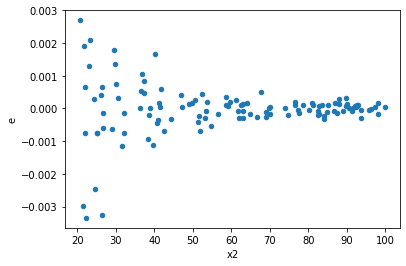

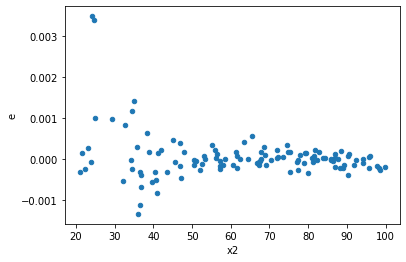

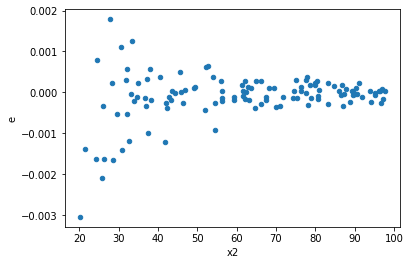

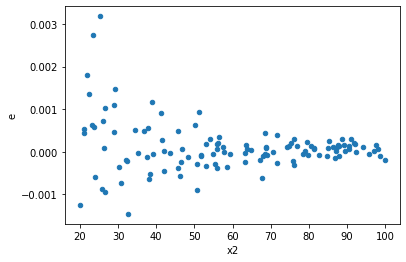

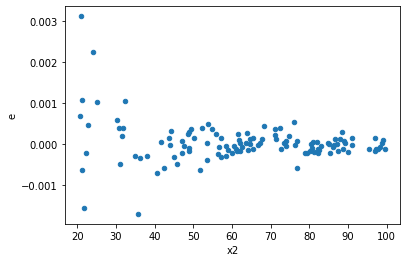

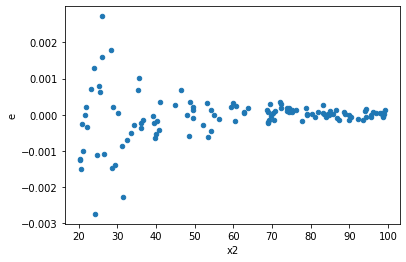

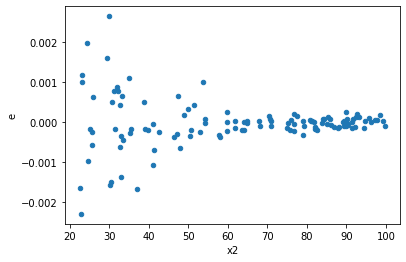

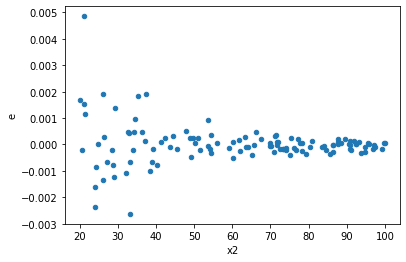

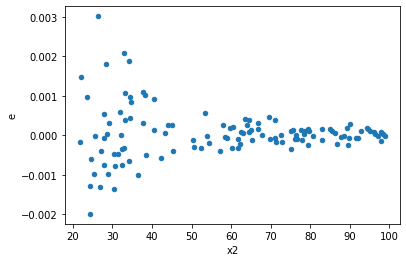

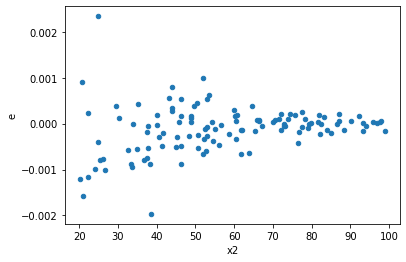

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,66.0,48.0,2.6937165085888288e-05,4.777968685091542e-05,4.081388649377013e-07,9.954101427274046e-07,2.438900649364389,0.0015140532478790103,0.9992429733760605,0.0007570266239395051,Reject005=0 : Heteroscedasticity
2.0,67.0,47.0,2.0348232262125655e-05,1.779965863745111e-05,3.037049591362038e-07,3.7871614122236407e-07,1.2469870175959812,0.42667598093732395,0.786662009531338,0.21333799046866198,Reject005=1 : Homoscedasticity
3.0,46.0,68.0,3.794123070286613e-06,3.3064828479378526e-05,8.248093631057854e-08,4.862474776379195e-07,5.895271069753316,6.889622206074364e-11,0.9999999999655519,3.444811103037182e-11,Reject005=0 : Heteroscedasticity
4.0,59.0,55.0,3.9085023821154534e-06,2.517383860642828e-05,6.624580308670261e-08,4.5770615648051413e-07,6.909209869211905,1.7467360891032513e-11,0.9999999999912663,8.733680445516256e-12,Reject005=0 : Heteroscedasticity
5.0,60.0,54.0,1.3993418129136998e-05,3.0464741752622183e-05,2.3322363548561664e-07,5.641618843078182e-07,2.4189738880157847,0.0012147716178538825,0.9993926141910731,0.0006073858089269413,Reject005=0 : Heteroscedasticity
6.0,72.0,42.0,8.604802627210203e-06,3.535344794690141e-05,1.195111476001417e-07,8.417487606405098e-07,7.043265649634777,6.867737489812953e-10,0.9999999996566131,3.4338687449064764e-10,Reject005=0 : Heteroscedasticity
7.0,66.0,48.0,1.4485498208902011e-05,5.5650182728165055e-05,2.194772455894244e-07,1.159378806836772e-06,5.282455608202863,1.653972603321563e-08,0.999999991730137,8.269863016607815e-09,Reject005=0 : Heteroscedasticity
8.0,60.0,54.0,1.3358307265624561e-05,3.525446218249758e-05,2.2263845442707601e-07,6.528604107869923e-07,2.932379370253098,9.32176184718081e-05,0.9999533911907641,4.660880923590405e-05,Reject005=0 : Heteroscedasticity
9.0,56.0,58.0,6.074107132538315e-06,2.2462905647910404e-05,1.0846619879532706e-07,3.8729147668811043e-07,3.5706190591127798,3.277160954606728e-06,0.9999983614195227,1.638580477303364e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,66.0,48.0,2.6937165085888288e-05,4.777968685091542e-05,4.081388649377013e-07,9.954101427274046e-07,2.438900649364389,0.0015140532478790103,Reject005=0 : Heteroscedasticity
1.0,67.0,47.0,2.9850050345086427e-05,4.905444209297321e-06,4.455231394789019e-07,1.043711533893047e-07,0.23426651534055118,7.258519543270905e-08,Reject005=0 : Heteroscedasticity
2.0,67.0,47.0,2.0348232262125655e-05,1.779965863745111e-05,3.037049591362038e-07,3.7871614122236407e-07,1.2469870175959812,0.42667598093732395,Reject005=1 : Homoscedasticity
3.0,46.0,68.0,3.794123070286613e-06,3.3064828479378526e-05,8.248093631057854e-08,4.862474776379195e-07,5.895271069753316,6.889622206074364e-11,Reject005=0 : Heteroscedasticity
4.0,59.0,55.0,3.9085023821154534e-06,2.517383860642828e-05,6.624580308670261e-08,4.5770615648051413e-07,6.909209869211905,1.7467360891032513e-11,Reject005=0 : Heteroscedasticity
5.0,60.0,54.0,1.3993418129136998e-05,3.0464741752622183e-05,2.3322363548561664e-07,5.641618843078182e-07,2.4189738880157847,0.0012147716178538825,Reject005=0 : Heteroscedasticity
6.0,72.0,42.0,8.604802627210203e-06,3.535344794690141e-05,1.195111476001417e-07,8.417487606405098e-07,7.043265649634777,6.867737489812953e-10,Reject005=0 : Heteroscedasticity
7.0,66.0,48.0,1.4485498208902011e-05,5.5650182728165055e-05,2.194772455894244e-07,1.159378806836772e-06,5.282455608202863,1.653972603321563e-08,Reject005=0 : Heteroscedasticity
8.0,60.0,54.0,1.3358307265624561e-05,3.525446218249758e-05,2.2263845442707601e-07,6.528604107869923e-07,2.932379370253098,9.32176184718081e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    915
Reject005=1 : Homoscedasticity       85
Name: Result_test, dtype: int64